# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [314]:
df = pd.read_csv('/content/airbnb_hw.csv')
df0 = df

# Exploratory Data Analysis
1. Clean the data and perform some EDA and visualization to get to know the data set.

In [315]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [316]:
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [317]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [318]:
df.dtypes

,0
Host Id,int64
Host Since,object
Name,object
Neighbourhood,object
Property Type,object
Review Scores Rating (bin),float64
Room Type,object
Zipcode,float64
Beds,float64
Number of Records,int64


In [319]:
df['Review Scores Rating (bin)'].unique()

array([ nan,  95., 100.,  90.,  85.,  80.,  75.,  65.,  70.,  60.,  40.,
        50.,  20.,  55.,  45.,  30.])

In [320]:
df['Review Scores Rating'].unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [321]:
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

## Removing Characters from the Price Variable

In [322]:
df['Price'] = df['Price'].str.replace(",", "")
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

## Removing Space from Neighborhood Name

In [323]:
df['Neighborhood'] = df['Neighbourhood ']

## Changing the Hosting Since Variable to Years as a Host

In [324]:
df['Start Year'] = pd.to_numeric(df['Host Since'].str[-4:])
df['Years Hosting'] = 2025-df['Start Year']
df = df.drop(columns=['Host Since'])

In [325]:
df.columns


Index(['Host Id', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Neighborhood', 'Start Year', 'Years Hosting'],
      dtype='object')

## Dealing with Missing Values

In [326]:
print(len(df))

30478


In [327]:
df.isna().sum()

,0
Host Id,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0
Number Of Reviews,0


In [328]:
df.dropna()
df.dropna(inplace=True)

In [329]:
df.isna().sum()

,0
Host Id,0
Name,0
Neighbourhood,0
Property Type,0
Review Scores Rating (bin),0
Room Type,0
Zipcode,0
Beds,0
Number of Records,0
Number Of Reviews,0


I chose to drop the na values in the review scores rating, because I plan on regressing on this and I feel that taking an average and replacing that with the rating would misrepresent the data. I also chose to drop the miscellaneous rows with missing values because it did not represent a large portion of the data, leading me to believe that these values weren't very statistically significant.

## Looking at the Distribution of the Price Variable

(array([2.1972e+04, 2.6000e+01, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   10.,  1009.,  2008.,  3007.,  4006.,  5005.,  6004.,  7003.,
         8002.,  9001., 10000.]),
 <BarContainer object of 10 artists>)

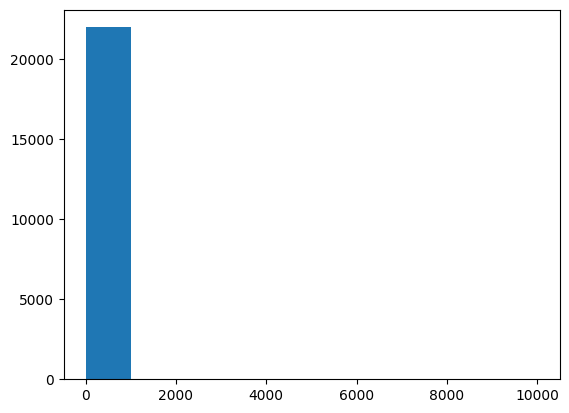

In [330]:
plt.hist(df['Price'])

It appears that this bar graph doesn't reveal much. Let's use the log transformation to show how the data varies.

<Axes: >

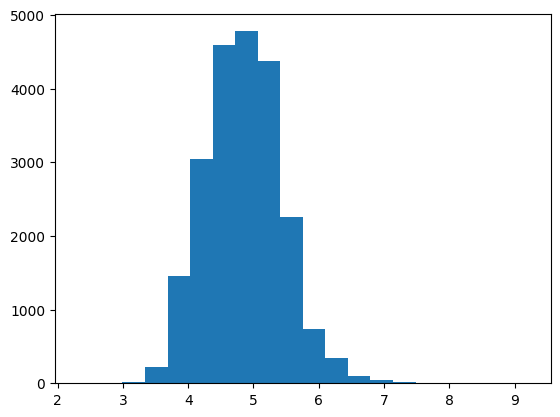

In [293]:
df['PriceLog'] = np.log(df['Price'])
df.loc[df['PriceLog']>0,'PriceLog'].hist(bins=20,grid=False)

## Looking at the Distribution of the Bed Variable

(array([1.4453e+04, 6.4980e+03, 5.9600e+02, 3.6800e+02, 3.8000e+01,
        2.5000e+01, 1.8000e+01, 4.0000e+00, 0.0000e+00, 1.0000e+01]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

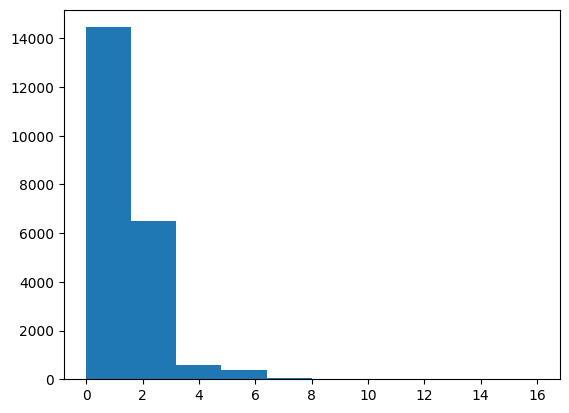

In [294]:
plt.hist(df['Beds'])

## Looking at the Distribution of the Neighborhood Variable

(array([11693.,     0.,  8432.,     0.,     0.,  1576.,     0.,   215.,
            0.,    94.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

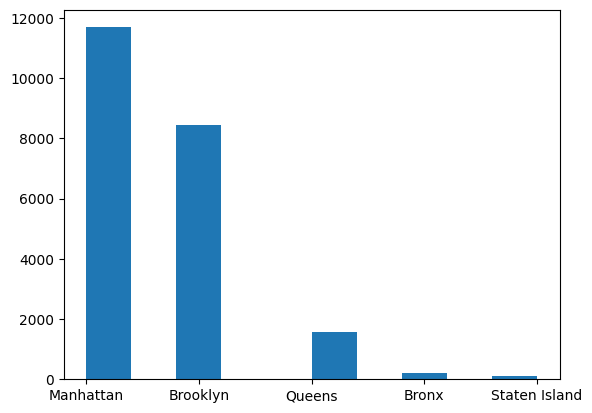

In [295]:
plt.hist(df['Neighborhood'])

## Looking at Distribution of Property Type

(array([ 8669.,     0.,     0.,     0.,     0., 12800.,     0.,     0.,
            0.,   541.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

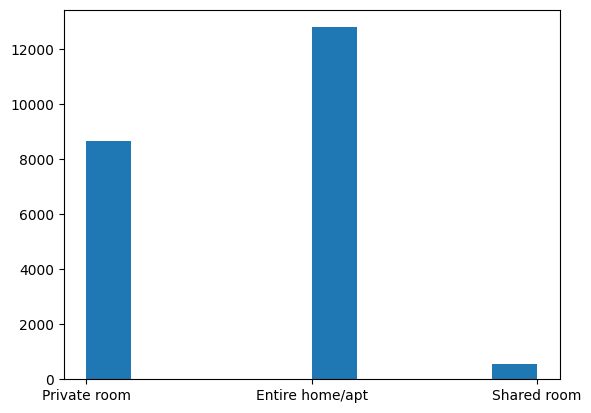

In [296]:
plt.hist(df['Room Type'])

## Looking at the Distribution of Years Hosting

In [297]:
df['Years Hosting'].describe()

,Years Hosting
count,22010.000000
mean,12.198092
std,1.496605
min,10.000000
25%,11.000000
50%,12.000000
75%,13.000000
max,17.000000


(array([2740., 5527., 4843.,    0., 4586., 2664.,    0., 1177.,  443.,
          30.]),
 array([10. , 10.7, 11.4, 12.1, 12.8, 13.5, 14.2, 14.9, 15.6, 16.3, 17. ]),
 <BarContainer object of 10 artists>)

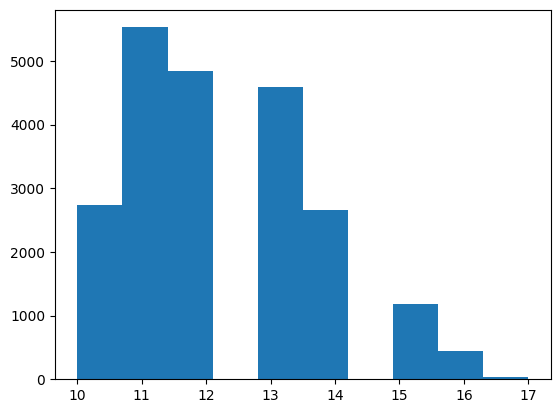

In [298]:
plt.hist(df['Years Hosting'])

## Looking at the Distribution of Review Score Rating

(array([3.9000e+01, 2.0000e+00, 4.9000e+01, 2.3000e+01, 1.5000e+01,
        3.2300e+02, 3.9000e+02, 2.1620e+03, 5.3930e+03, 1.3614e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <BarContainer object of 10 artists>)

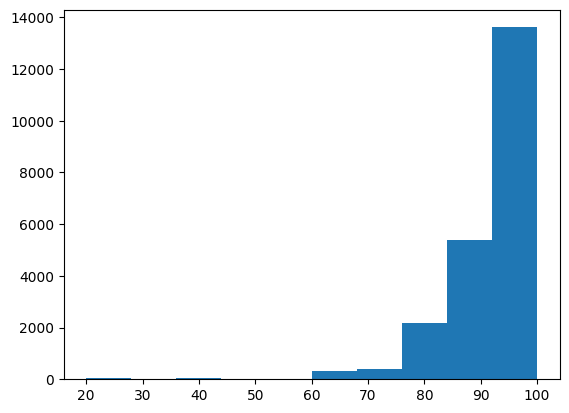

In [299]:
plt.hist(df['Review Scores Rating'], bins = 10)

## Comparing Price with Different Variables
I'd like to regress with the target variable of price, so I'm looking at the relationship of different variables with Price.

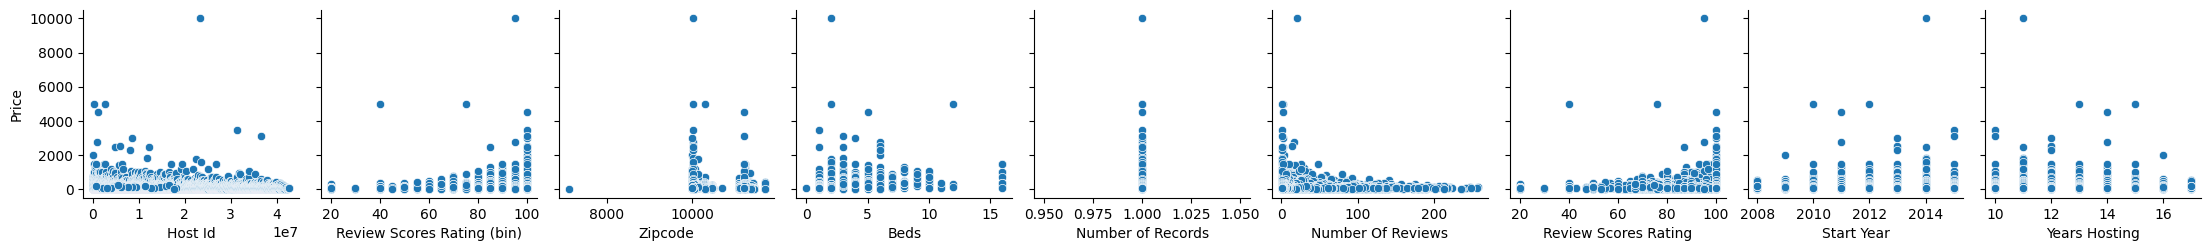

In [331]:
sns.pairplot(df, y_vars=['Price'], x_vars=[col for col in df.select_dtypes(include="number").columns if col != 'Price'])
plt.show()

## Looking at Density of Beds based on Neighborhood

<Axes: xlabel='Beds', ylabel='Density'>

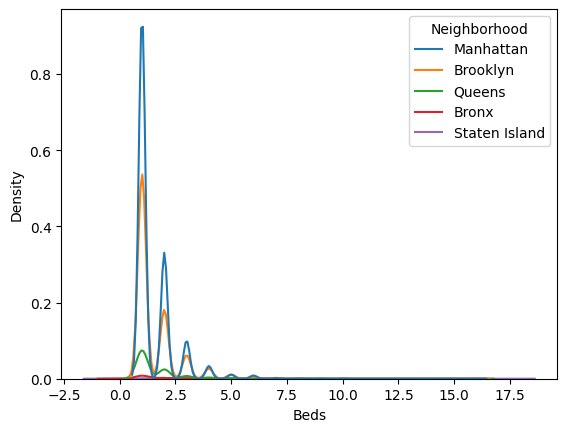

In [332]:
sns.kdeplot(data=df, x="Beds", hue="Neighborhood")

## Looking at Density of Price based on Neighborhood

<Axes: xlabel='Price', ylabel='Density'>

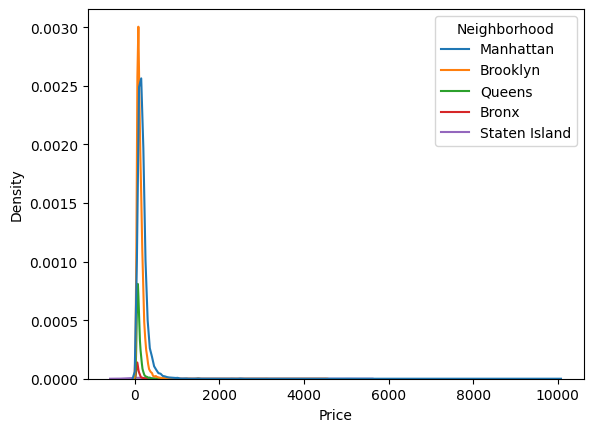

In [333]:
sns.kdeplot(data=df, x="Price", hue="Neighborhood")

# Variable Transformation
Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [348]:
df.columns

Index(['Host Id', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Neighborhood', 'Start Year', 'Years Hosting'],
      dtype='object')

In [349]:
dummyneighbors = pd.get_dummies(df['Neighborhood'], dtype=float, drop_first=False)
dummyproperties = pd.get_dummies(df['Property Type'], dtype=float, drop_first=False)
dummyroom = pd.get_dummies(df['Room Type'], dtype=float, drop_first=False)


df2 = df.copy()


df2.drop(['Neighborhood', 'Neighbourhood ', 'Property Type', 'Name', 'Room Type'], axis=1, inplace=True)


df2 = pd.concat([df2, dummyneighbors, dummyproperties], axis=1)


price = df2['Price']

print(df2.head())
print(price.head())


   Host Id  Review Scores Rating (bin)  Zipcode  Beds  Number of Records  \
4      500                        95.0  10036.0   3.0                  1   
5     1039                       100.0  11222.0   1.0                  1   
6     1783                       100.0  10004.0   1.0                  1   
7     2078                        90.0  11201.0   1.0                  1   
8     2339                        90.0  10009.0   2.0                  1   

   Number Of Reviews  Price  Review Scores Rating  Start Year  Years Hosting  \
4                 39    549                  96.0      2008.0           17.0   
5                  4    149                 100.0      2008.0           17.0   
6                  9    250                 100.0      2008.0           17.0   
7                 80     90                  94.0      2008.0           17.0   
8                 95    270                  90.0      2008.0           17.0   

   ...  Condominium  Dorm  House  Hut  Lighthouse  Loft  Other

In [350]:
df2.columns

Index(['Host Id', 'Review Scores Rating (bin)', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Start Year', 'Years Hosting', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle',
       'Chalet', 'Condominium', 'Dorm', 'House', 'Hut', 'Lighthouse', 'Loft',
       'Other', 'Townhouse', 'Treehouse', 'Villa'],
      dtype='object')

In [351]:
df2.head()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Start Year,Years Hosting,...,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Townhouse,Treehouse,Villa
4,500,95.0,10036.0,3.0,1,39,549,96.0,2008.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1039,100.0,11222.0,1.0,1,4,149,100.0,2008.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1783,100.0,10004.0,1.0,1,9,250,100.0,2008.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2078,90.0,11201.0,1.0,1,80,90,94.0,2008.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2339,90.0,10009.0,2.0,1,95,270,90.0,2008.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Implementing a Test and Training Set
3. Implement an 80/20 train-test split. Put the test data aside.

# Simple Linear Models
Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  𝑅2  on the both the training and test sets. Which of your models does the best?

## All Variables in the Linear Regression

In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, price, test_size=0.2, random_state=42)

In [363]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print("Training Data R-Squared Value:")
print(res_data.score(X_train, y_train))

train = res_data.predict(X_train)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train, y_train))

test = res_data.predict(X_test)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
1.0
The RMSE for Training Data:
217.2156644560505
Testing Data R-Squared Value:
1.0
The RMSE for Testing Data:
149.93416035288607


This model is clearly overfitting due to having zero error, leading me to believe there is an issue due to including so many variables.

## Regressing based on Beds and Neighborhood

In [364]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(pd.concat([df2[['Beds']], dummyneighbors], axis=1), price, test_size=0.2, random_state=100)


In [365]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.17577690902531817
The RMSE for Training Data:
158.18552790664174
Testing Data R-Squared Value:
0.17577690902531817
The RMSE for Testing Data:
126.48688669782166


This performance is very weak.

## Regressing based on Room and Property Type

In [366]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(pd.concat([dummyroom, dummyproperties], axis=1), price, test_size=0.2, random_state=100)

In [367]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.14463801706979074
The RMSE for Training Data:
154.0420758090854
Testing Data R-Squared Value:
0.14463801706979074
The RMSE for Testing Data:
126.47172233878277


This is a weak model.

In [368]:
df2.columns

Index(['Host Id', 'Review Scores Rating (bin)', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Start Year', 'Years Hosting', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle',
       'Chalet', 'Condominium', 'Dorm', 'House', 'Hut', 'Lighthouse', 'Loft',
       'Other', 'Townhouse', 'Treehouse', 'Villa'],
      dtype='object')

In [369]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(pd.concat([df2['Beds'], dummyroom], axis=1), price, test_size=0.2, random_state=100)

In [370]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.20350849998975584
The RMSE for Training Data:
159.40574764326723
Testing Data R-Squared Value:
0.20350849998975584
The RMSE for Testing Data:
129.60825094397285


This is the current best model, though it is slightly weak.

## What Model Performs the Best?
The model that performed the best regressed on the Room Type and number of Beds.

# Linear Property
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?

## Beds

In [371]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Beds']], price, test_size=0.2, random_state=100)

In [372]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.06149040599680622
The RMSE for Training Data:
171.87516530763406
Testing Data R-Squared Value:
0.06149040599680622
The RMSE for Testing Data:
137.8709430181805


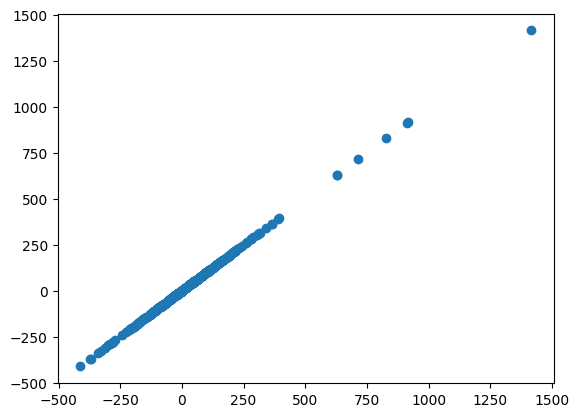

In [373]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

In [374]:
df2.columns

Index(['Host Id', 'Review Scores Rating (bin)', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Start Year', 'Years Hosting', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle',
       'Chalet', 'Condominium', 'Dorm', 'House', 'Hut', 'Lighthouse', 'Loft',
       'Other', 'Townhouse', 'Treehouse', 'Villa'],
      dtype='object')

## Review Scores Rating

In [375]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Review Scores Rating']], price, test_size=0.2, random_state=100)

In [376]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.0019696962044950528
The RMSE for Training Data:
143.27526901376712
Testing Data R-Squared Value:
0.0019696962044950528
The RMSE for Testing Data:
112.4298842161822


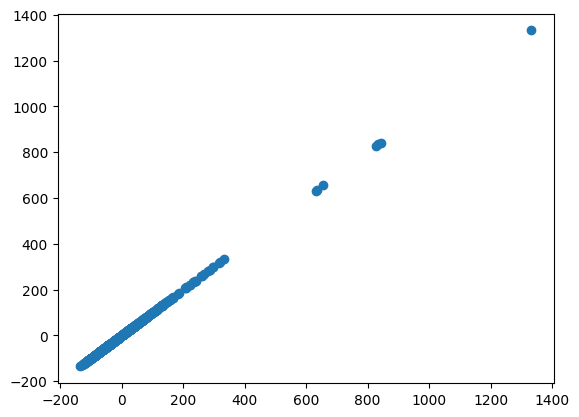

In [377]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

In [378]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Years Hosting']], price, test_size=0.2, random_state=100)

In [379]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
-0.004689062183912407
The RMSE for Training Data:
143.88478956782916
Testing Data R-Squared Value:
-0.004689062183912407
The RMSE for Testing Data:
114.56346473378369


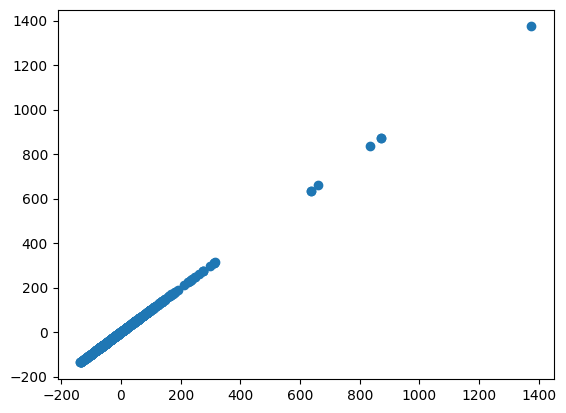

In [380]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

## Zip Code

In [381]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Zipcode']], price, test_size=0.2, random_state=100)

In [382]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
-0.02470431353643776
The RMSE for Training Data:
142.7258962060684
Testing Data R-Squared Value:
-0.02470431353643776
The RMSE for Testing Data:
113.20113697980938


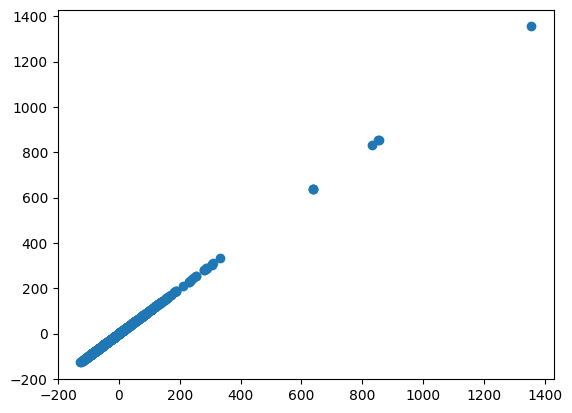

In [383]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

## Number of Reviews

In [384]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Number Of Reviews']], price, test_size=0.2, random_state=100)

In [385]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
-0.6939970249153087
The RMSE for Training Data:
194.60358573192707
Testing Data R-Squared Value:
-0.6939970249153087
The RMSE for Testing Data:
171.68069668720221


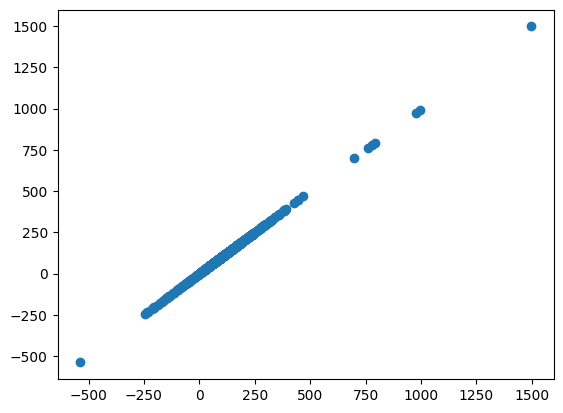

In [386]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

## Number of Records

In [387]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df2[['Number of Records']], price, test_size=0.2, random_state=100)

In [388]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.0
The RMSE for Training Data:
142.4438095426475
Testing Data R-Squared Value:
0.0
The RMSE for Testing Data:
112.82475829839844


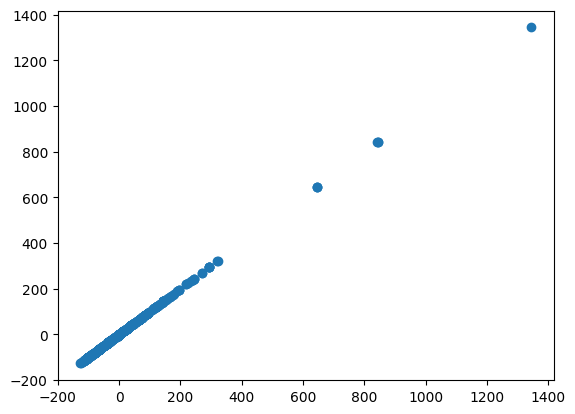

In [389]:
plt.scatter(x = test_df['Residuals'], y = test_df['Residuals'])

## None of the singular variables are non linear.

# Transformations and Interactions
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  𝑅2  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [408]:
df3 = df2.copy()
df3['Beds_arcsin'] = np.arcsinh(df2['Beds'])
df3['Years Hosting_arcsin'] = np.arcsinh(df3['Years Hosting'])
df3['Reviews_arcsin'] = np.arcsinh(df3['Review Scores Rating'])
df3.columns

Index(['Host Id', 'Review Scores Rating (bin)', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating', 'Start Year', 'Years Hosting', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Apartment',
       'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle',
       'Chalet', 'Condominium', 'Dorm', 'House', 'Hut', 'Lighthouse', 'Loft',
       'Other', 'Townhouse', 'Treehouse', 'Villa', 'Beds_arcsin',
       'Years Hosting_arcsin', 'Reviews_arcsin'],
      dtype='object')

In [411]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(pd.concat([df3[['Beds_arcsin']], dummyroom], axis=1), price, test_size=0.2, random_state=100)

In [413]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train4, y_train4)
print("Training Data R-Squared Value:")
print(res_data.score(X_train4, y_train4))

train = res_data.predict(X_train4)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train4
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train4, y_train4))

test = res_data.predict(X_test4)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test4
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
0.19140602798478035
The RMSE for Training Data:
158.32527016138582
Testing Data R-Squared Value:
0.19140602798478035
The RMSE for Testing Data:
130.09029209617353


This one performed worse than the linear model.

In [414]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3, price, test_size=0.2, random_state=42)

In [415]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train3, y_train3)
print("Training Data R-Squared Value:")
print(res_data.score(X_train3, y_train3))

train = res_data.predict(X_train3)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train3
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train3, y_train3))

test = res_data.predict(X_test3)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test3
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
1.0
The RMSE for Training Data:
217.21566445604995
Testing Data R-Squared Value:
1.0
The RMSE for Testing Data:
149.9341603528862


This one performed very well.

In [420]:
df4 = df2.copy()
df4['log_Beds'] = np.log(df4['Beds'] + 1)
df4['log_Years_Hosting'] = np.log(df4['Years Hosting'] + 1)
df4['log_Reviews'] = np.log(df4['Review Scores Rating'] + 1)

In [421]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df4, price, test_size=0.2, random_state=42)

In [422]:
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train1, y_train1)
print("Training Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

train = res_data.predict(X_train1)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train1
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for Training Data:")
RMSE = np.sqrt(np.mean(np.square(train_df['Residuals'])))
print(RMSE)

print("Testing Data R-Squared Value:")
print(res_data.score(X_train1, y_train1))

test = res_data.predict(X_test1)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test1
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for Testing Data:")
RMSE = np.sqrt(np.mean(np.square(test_df['Residuals'])))
print(RMSE)

Training Data R-Squared Value:
1.0
The RMSE for Training Data:
217.21566445605018
Testing Data R-Squared Value:
1.0
The RMSE for Testing Data:
149.9341603528863


This model is very good.

## The more complex models are more accurate due to their ability to deal with uncertainty better. The log transformations worked the best.

# Conclusion
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?

Through this lab, I found the importance of EDA and true decision making it building models. From the start, what was done with missing values had an impact on the findings, and I wasn't sure how to handle it. Now at the end of this lab, I think I should've taken the mean and replaced it for the review scores rating. When it comes to overfitting and underfitting, it was clear that the models were not well built. All of my high fitting models had 100% explained variance meaning they were likely overfitted due to an absence of noise. This made me realize the importantance of testing different variables and transformations to maximize the findings in a data project.